# McDonalds Restaurant Reviews

## Goals
* Overall sentiment summary
* Top complaints and praises
* trending issues
* customer suggestions
* location specific insights

# Data cleaning and Visualizations

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import re

# Load the CSV with the detected encoding
df = pd.read_csv('McDonald_s_Reviews.csv', encoding = "ISO-8859-1")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [48]:
#check for missing values
print(df.isnull().sum())

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64


In [49]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [50]:
#noticing there are some reviews and an address that contain weird encoding... identify those
problematic_rows = df[df["review"].str.contains("¿", na=False)]
len(problematic_rows)

2964

In [51]:
print(problematic_rows["review"].iloc[7])

McDonaldï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½s is proud to own the most broken ice cream machines on the planet. When I asked at the drive through if they had ice cream the lady replied ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½naï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï


In [52]:
#remove the jumbled address
# Function to detect non-ASCII characters
def contains_garbled_text(text):
    return bool(re.search(r'[^\x00-\x7F]+', text))

df = df[~df["store_address"].apply(contains_garbled_text)]

In [53]:
review_counts = df["store_address"].value_counts()
print(review_counts)

store_address
9814 International Dr, Orlando, FL 32819, United States                       1890
5725 W Irlo Bronson Memorial Hwy, Kissimmee, FL 34746, United States          1720
10901 Riverside Dr, North Hollywood, CA 91602, United States                  1710
1415 E State Rd, Fern Park, FL 32730, United States                           1700
632 S R L Thornton Freeway Service Rd, Dallas, TX 75203, United States        1650
3501 Biscayne Blvd, Miami, FL 33137, United States                            1570
621 Broadway, Newark, NJ 07104, United States                                 1290
1100 N US Hwy 377, Roanoke, TX 76262, United States                           1168
72-69 Kissena Blvd, Queens, NY 11367, United States                           1140
429 7th Ave, New York, NY 10001, United States                                1140
724 Broadway, New York, NY 10003, United States                               1140
By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United State

In [54]:
#replace the jumbled characters in the actual reviews with empty str
def clean_review(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)  # Replace non-ASCII characters with empty str

df["cleaned_review"] = df["review"].apply(clean_review)

In [55]:
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,cleaned_review
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Why does it look like someone spit on my food?...
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,It'd McDonalds. It is what it is as far as the...
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,Made a mobile order got to the speaker and che...
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,My mc. Crispy chicken sandwich was customer s...
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,"I repeat my order 3 times in the drive thru, a..."


In [56]:
problematic_rows = df[df["review"].str.contains("¿", na=False)]
print(problematic_rows["review"].iloc[1])
print(df["cleaned_review"].iloc[3])

My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ customer service was quick and p
My mc. Crispy chicken sandwich was  customer service was quick and p


In [57]:
df["review_length"] = df["cleaned_review"].str.len()
print(df["review_length"].describe())

count    32736.000000
mean       118.076369
std        174.811105
min          0.000000
25%         15.000000
50%         58.000000
75%        150.000000
max       3115.000000
Name: review_length, dtype: float64


In [58]:
short_reviews = df[df["review_length"] < 2]
short_reviews[["cleaned_review", "review_length"]].head(20)

,cleaned_review,review_length
604,,1
2542,,1
2568,,1
2764,,1
2902,,1
3566,,1
3686,,1
3782,,1
4802,,1
4898,,1


In [59]:
#seems like reviews less than 2 characters long are useless. I will remove these.
df = df[df["review_length"] >= 2]
df.reset_index(drop=True, inplace=True)  # Reset index after dropping rows
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,cleaned_review,review_length
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Why does it look like someone spit on my food?...,259
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,It'd McDonalds. It is what it is as far as the...,237
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,Made a mobile order got to the speaker and che...,332
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,My mc. Crispy chicken sandwich was customer s...,68
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,"I repeat my order 3 times in the drive thru, a...",312


In [60]:
#removing irrelevant columns
df = df.drop(df.columns[[0, 1, 2, 4, 5, 6, 8]], axis=1)
df.reset_index(drop=True, inplace=True)
df.head()

,store_address,review_time,rating,cleaned_review,review_length
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1 star,Why does it look like someone spit on my food?...,259
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,4 stars,It'd McDonalds. It is what it is as far as the...,237
2,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,1 star,Made a mobile order got to the speaker and che...,332
3,"13749 US-183 Hwy, Austin, TX 78750, United States",a month ago,5 stars,My mc. Crispy chicken sandwich was customer s...,68
4,"13749 US-183 Hwy, Austin, TX 78750, United States",2 months ago,1 star,"I repeat my order 3 times in the drive thru, a...",312


In [61]:
df["review_length"].describe()

count    32684.000000
mean       118.262973
std        174.887451
min          2.000000
25%         15.000000
50%         58.000000
75%        150.000000
max       3115.000000
Name: review_length, dtype: float64

In [62]:
# Remove blank review
df = df[df["cleaned_review"].str.strip() != ""]
df.reset_index(drop=True, inplace=True)

In [63]:
#remove any excess whitespace
df["cleaned_review"] = df["cleaned_review"].str.replace(r'\s+', ' ', regex=True)

In [64]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df["sentiment_scores"] = df["cleaned_review"].apply(lambda x: analyzer.polarity_scores(x))

# Extract individual sentiment components (if needed)
df["positive_score"] = df["sentiment_scores"].apply(lambda x: x['pos'])
df["neutral_score"] = df["sentiment_scores"].apply(lambda x: x['neu'])
df["negative_score"] = df["sentiment_scores"].apply(lambda x: x['neg'])
df["compound_score"] = df["sentiment_scores"].apply(lambda x: x['compound'])

In [65]:
# Categorize sentiment
df["vader_sentiment"] = df["compound_score"].apply(lambda x: "positive" if x > 0.05 else ("negative" if x < -0.05 else "neutral"))

# Count each category
sentiment_counts = df["vader_sentiment"].value_counts()
print(sentiment_counts)


vader_sentiment
positive    17126
negative     9416
neutral      6141
Name: count, dtype: int64


In [66]:
df.head()

,store_address,review_time,rating,cleaned_review,review_length,sentiment_scores,positive_score,neutral_score,negative_score,compound_score,vader_sentiment
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1 star,Why does it look like someone spit on my food?...,259,"{'neg': 0.025, 'neu': 0.888, 'pos': 0.087, 'co...",0.087,0.888,0.025,0.5215,positive
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,4 stars,It'd McDonalds. It is what it is as far as the...,237,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.201,0.799,0.000,0.8687,positive
2,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,1 star,Made a mobile order got to the speaker and che...,332,"{'neg': 0.045, 'neu': 0.955, 'pos': 0.0, 'comp...",0.000,0.955,0.045,-0.2960,negative
3,"13749 US-183 Hwy, Austin, TX 78750, United States",a month ago,5 stars,My mc. Crispy chicken sandwich was customer se...,68,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral
4,"13749 US-183 Hwy, Austin, TX 78750, United States",2 months ago,1 star,"I repeat my order 3 times in the drive thru, a...",312,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...",0.000,0.874,0.126,-0.8020,negative


In [67]:
df["cleaned_review"].iloc[0]

'Why does it look like someone spit on my food? I had a normal transaction, everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.'

In [68]:
df["rating"] = df["rating"].str.extract("(\d)").astype(int)

In [69]:
def refine_sentiment(row):
    if row["rating"] <= 2:
        return "negative"
    elif row["rating"] >= 4 and row["compound_score"] > 0.05:
        return "positive"
    elif row["rating"] == 3:
        return "neutral"
    else:
        return "mixed"

df["refined_sentiment"] = df.apply(refine_sentiment, axis=1)

In [70]:
df.head(10)

,store_address,review_time,rating,cleaned_review,review_length,sentiment_scores,positive_score,neutral_score,negative_score,compound_score,vader_sentiment,refined_sentiment
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1,Why does it look like someone spit on my food?...,259,"{'neg': 0.025, 'neu': 0.888, 'pos': 0.087, 'co...",0.087,0.888,0.025,0.5215,positive,negative
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,4,It'd McDonalds. It is what it is as far as the...,237,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.201,0.799,0.000,0.8687,positive,positive
2,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,1,Made a mobile order got to the speaker and che...,332,"{'neg': 0.045, 'neu': 0.955, 'pos': 0.0, 'comp...",0.000,0.955,0.045,-0.2960,negative,negative
3,"13749 US-183 Hwy, Austin, TX 78750, United States",a month ago,5,My mc. Crispy chicken sandwich was customer se...,68,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral,mixed
4,"13749 US-183 Hwy, Austin, TX 78750, United States",2 months ago,1,"I repeat my order 3 times in the drive thru, a...",312,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...",0.000,0.874,0.126,-0.8020,negative,negative
5,"13749 US-183 Hwy, Austin, TX 78750, United States",3 weeks ago,1,I work for door dash and they locked us all ou...,191,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",0.000,0.905,0.095,-0.5267,negative,negative
6,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1,If I could give this location a zero on custom...,879,"{'neg': 0.065, 'neu': 0.92, 'pos': 0.015, 'com...",0.015,0.920,0.065,-0.7748,negative,negative
7,"13749 US-183 Hwy, Austin, TX 78750, United States",a year ago,1,Came in and ordered a Large coffee w/no ice. T...,292,"{'neg': 0.021, 'neu': 0.934, 'pos': 0.045, 'co...",0.045,0.934,0.021,0.3818,positive,negative
8,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1,Went thru drive thru. Ordered. Getting home no...,195,"{'neg': 0.182, 'neu': 0.818, 'pos': 0.0, 'comp...",0.000,0.818,0.182,-0.6901,negative,negative
9,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,4,"I'm not really a huge fan of fast food, but I ...",557,"{'neg': 0.011, 'neu': 0.645, 'pos': 0.344, 'co...",0.344,0.645,0.011,0.9946,positive,positive


In [71]:
df["cleaned_review"].iloc[7]

'Came in and ordered a Large coffee w/no ice. They handed me a cup that was less than half way full. I asked the employee, Flor, if they could give me a Large coffee w/no ice and she said no. I was willing to pay more to get a full cup of coffee. I always get a large sweet tea w/no ice and it'

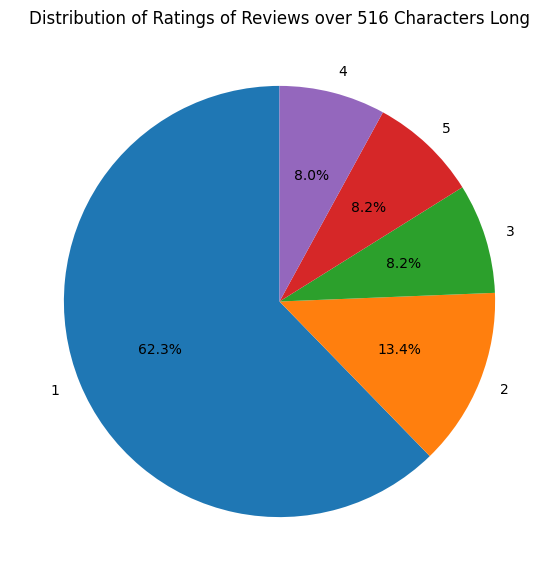

In [72]:
long_reviews = df[df["review_length"] > 516]
#long_reviews.info()
long_reviews['rating'].value_counts().plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ratings of Reviews over 516 Characters Long')
plt.ylabel('')  # Remove ylabel for clarity
plt.show()

In [73]:
pos_long_reviews = long_reviews[long_reviews['rating'] > 3].head()
pos_long_reviews['cleaned_review'].iloc[2]

"EDIT: Recently this McDonald's had been improving a lot, especial when compared to other McDonald's in the area (maybe the one on North part of W. Parmer, but not really fair comparison, I mean That one has a god-damn waterfall....). Keep up the good work! +1 Star OLD: They took out all the power outlets and a table was just left broken covered with caution tape. Always understaffed and you can tell the owners are sucking this place for every penny without putting anything back in. Gives family owned McDonald's a bad name."

In [74]:
from transformers import pipeline

# Create a sentiment analysis pipeline with truncation
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    framework="pt",  # or "tf" if you're using TensorFlow
    truncation=True
)

# Apply it to the cleaned review column
df["bert_sentiment"] = df["cleaned_review"].apply(lambda x: sentiment_pipeline(x)[0]["label"])


Device set to use cpu


In [75]:
df.head()

,store_address,review_time,rating,cleaned_review,review_length,sentiment_scores,positive_score,neutral_score,negative_score,compound_score,vader_sentiment,refined_sentiment,bert_sentiment
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1,Why does it look like someone spit on my food?...,259,"{'neg': 0.025, 'neu': 0.888, 'pos': 0.087, 'co...",0.087,0.888,0.025,0.5215,positive,negative,NEGATIVE
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,4,It'd McDonalds. It is what it is as far as the...,237,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.201,0.799,0.000,0.8687,positive,positive,POSITIVE
2,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,1,Made a mobile order got to the speaker and che...,332,"{'neg': 0.045, 'neu': 0.955, 'pos': 0.0, 'comp...",0.000,0.955,0.045,-0.2960,negative,negative,NEGATIVE
3,"13749 US-183 Hwy, Austin, TX 78750, United States",a month ago,5,My mc. Crispy chicken sandwich was customer se...,68,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral,mixed,NEGATIVE
4,"13749 US-183 Hwy, Austin, TX 78750, United States",2 months ago,1,"I repeat my order 3 times in the drive thru, a...",312,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...",0.000,0.874,0.126,-0.8020,negative,negative,NEGATIVE


In [76]:
#it seems like both VADER and BERT are misclassifying reviews. 
#create column making 1,2 negative, 3 neutral, 4,5 positive.
# Mapping ratings to sentiment categories (you can adjust the ranges as necessary)
def map_rating_to_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating in [4, 5]:
        return 'positive'

df['actual_sentiment'] = df['rating'].apply(map_rating_to_sentiment)


In [78]:
df['bert_sentiment'] = df['bert_sentiment'].str.lower()

In [79]:
# Check how many reviews BERT got correct
df['bert_correct'] = df['bert_sentiment'] == df['actual_sentiment']
bert_accuracy = df['bert_correct'].mean()  # Percentage of correct classifications

# Check how many reviews VADER got correct
df['vader_correct'] = df['vader_sentiment'] == df['actual_sentiment']
vader_accuracy = df['vader_correct'].mean()  # Percentage of correct classifications

print(f"BERT Accuracy: {bert_accuracy * 100:.2f}%")
print(f"VADER Accuracy: {vader_accuracy * 100:.2f}%")


BERT Accuracy: 77.18%
VADER Accuracy: 70.36%


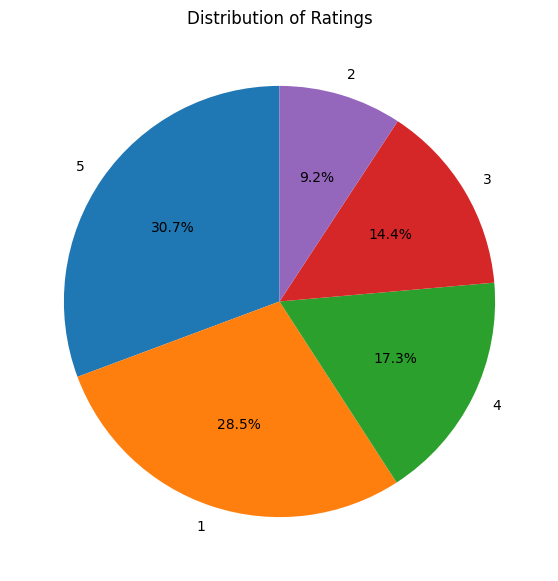

In [80]:
df['rating'].value_counts().plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ratings')
plt.ylabel('')  # Remove ylabel for clarity
plt.show()

In [81]:
df.head()

,store_address,review_time,rating,cleaned_review,review_length,sentiment_scores,positive_score,neutral_score,negative_score,compound_score,vader_sentiment,refined_sentiment,bert_sentiment,actual_sentiment,bert_correct,vader_correct
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1,Why does it look like someone spit on my food?...,259,"{'neg': 0.025, 'neu': 0.888, 'pos': 0.087, 'co...",0.087,0.888,0.025,0.5215,positive,negative,negative,negative,True,False
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,4,It'd McDonalds. It is what it is as far as the...,237,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.201,0.799,0.000,0.8687,positive,positive,positive,positive,True,True
2,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,1,Made a mobile order got to the speaker and che...,332,"{'neg': 0.045, 'neu': 0.955, 'pos': 0.0, 'comp...",0.000,0.955,0.045,-0.2960,negative,negative,negative,negative,True,True
3,"13749 US-183 Hwy, Austin, TX 78750, United States",a month ago,5,My mc. Crispy chicken sandwich was customer se...,68,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral,mixed,negative,positive,False,False
4,"13749 US-183 Hwy, Austin, TX 78750, United States",2 months ago,1,"I repeat my order 3 times in the drive thru, a...",312,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...",0.000,0.874,0.126,-0.8020,negative,negative,negative,negative,True,True


In [82]:
#removing irrelevant columns
df_2 = df.drop(df.columns[[5,6,7,8,9,10,11,12,13,14,15]], axis=1)
df_2.reset_index(drop=True, inplace=True)
df_2.head()

,store_address,review_time,rating,cleaned_review,review_length
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1,Why does it look like someone spit on my food?...,259
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,4,It'd McDonalds. It is what it is as far as the...,237
2,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,1,Made a mobile order got to the speaker and che...,332
3,"13749 US-183 Hwy, Austin, TX 78750, United States",a month ago,5,My mc. Crispy chicken sandwich was customer se...,68
4,"13749 US-183 Hwy, Austin, TX 78750, United States",2 months ago,1,"I repeat my order 3 times in the drive thru, a...",312


In [85]:
#make a city and state column for store address instead
df_2[['City', 'State']] = df_2['store_address'].apply(lambda x: pd.Series(x.split(', ')[-3:-1]))
df_2[['State', 'Zip']] = df_2['State'].str.split(' ', expand=True)
df_2.head()

,store_address,review_time,rating,cleaned_review,review_length,City,State,Zip
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1,Why does it look like someone spit on my food?...,259,Austin,TX,78750
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,4,It'd McDonalds. It is what it is as far as the...,237,Austin,TX,78750
2,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,1,Made a mobile order got to the speaker and che...,332,Austin,TX,78750
3,"13749 US-183 Hwy, Austin, TX 78750, United States",a month ago,5,My mc. Crispy chicken sandwich was customer se...,68,Austin,TX,78750
4,"13749 US-183 Hwy, Austin, TX 78750, United States",2 months ago,1,"I repeat my order 3 times in the drive thru, a...",312,Austin,TX,78750


In [87]:
df_2 = df_2.drop(df.columns[[0]], axis=1)
df_2.head()

,review_time,rating,cleaned_review,review_length,City,State,Zip
0,3 months ago,1,Why does it look like someone spit on my food?...,259,Austin,TX,78750
1,5 days ago,4,It'd McDonalds. It is what it is as far as the...,237,Austin,TX,78750
2,5 days ago,1,Made a mobile order got to the speaker and che...,332,Austin,TX,78750
3,a month ago,5,My mc. Crispy chicken sandwich was customer se...,68,Austin,TX,78750
4,2 months ago,1,"I repeat my order 3 times in the drive thru, a...",312,Austin,TX,78750
